Some Data Visualization

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/main_tfm_ML.csv')
df.info()

corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

MLP: 4 Layers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gel(kPa)       73 non-null     float64
 1   Area(um2)      73 non-null     float64
 2   Prestress(Pa)  73 non-null     float64
dtypes: float64(3)
memory usage: 1.8 KB
(73, 2) (73,)
(58, 2) (15, 2) (58, 1) (15, 1)
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_90 (Dense)            (None, 1024)              3072      
                                                                 
 dropout_54 (Dropout)        (None, 1024)              0         
                                                                 
 dense_91 (Dense)            (None, 512)               524800    
                                                                 
 dropout_55 (Dropout)        (None, 512) 

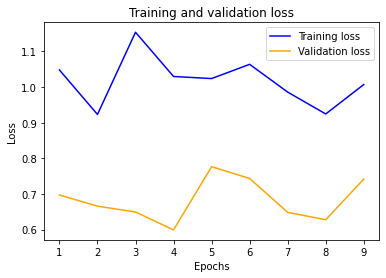

1/1 [==============================] - 0s 22ms/step


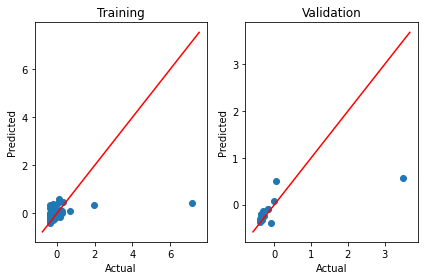

2/2 [==============================] - 0s 8ms/step
0.8944419847462075
0.5989613333791735
Test Accuracy: 110.6273 %.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

df = pd.read_csv('/content/2var_pres.csv')
df.info()

from keras.backend import reshape
# our target variable is 'Prestress'
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)



# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=123)



print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from keras.layers import Dense, Dropout

# Insert the dropout layer
model = Sequential()
model.add(Dense(1024, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5)) # specify a percentage between 0 and 0.5, or larger
model.add(Dense(1)) # output node
model.summary() # see what your model looks like

model.compile(optimizer='adam', loss='mse', metrics=['mae']) #lr=0.001

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=5,
                   restore_best_weights = True)

# fit the model!
# attach it to a new variable called 'history' in case
# to look at the learning curves
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test),
                    callbacks=[es],
                    epochs=500,
                    batch_size=4,
                    verbose=1)

# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test


errors = abs(pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 4), '%.')

Epoch 1/500
2/2 [==============================] - 4s 1s/step - loss: 0.3610 - mae: 0.3455 - val_loss: 3.5049 - val_mae: 0.6779
Epoch 2/500
2/2 [==============================] - 2s 757ms/step - loss: 0.3517 - mae: 0.3225 - val_loss: 3.5422 - val_mae: 0.6438
Epoch 3/500
2/2 [==============================] - 2s 730ms/step - loss: 0.3522 - mae: 0.2995 - val_loss: 3.5729 - val_mae: 0.6222
Epoch 4/500
2/2 [==============================] - 1s 688ms/step - loss: 0.3556 - mae: 0.2860 - val_loss: 3.5584 - val_mae: 0.6309
Epoch 5/500
2/2 [==============================] - 1s 684ms/step - loss: 0.3510 - mae: 0.2977 - val_loss: 3.5263 - val_mae: 0.6576
Epoch 6/500
2/2 [==============================] - 2s 741ms/step - loss: 0.3509 - mae: 0.3125 - val_loss: 3.5135 - val_mae: 0.6694
Epoch 7/500
2/2 [==============================] - 2s 734ms/step - loss: 0.3520 - mae: 0.3194 - val_loss: 3.5112 - val_mae: 0.6717
Epoch 8/500
2/2 [==============================] - 2s 714ms/step - loss: 0.3523 - mae:

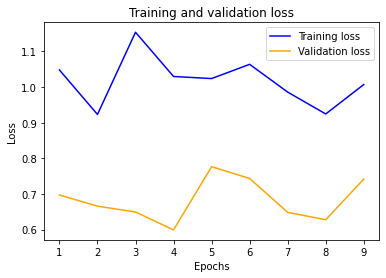

1/1 [==============================] - 0s 100ms/step


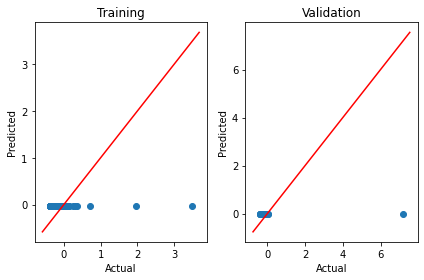

2/2 [==============================] - 0s 72ms/step
0.35303962945172845
3.5048992921217144
Test Accuracy: 142.2593 %.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPool1D , Flatten
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import numpy as np
import pandas as pd


import tensorflow as tf



# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/2var_pres.csv')


from keras.backend import reshape
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)



# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



model = Sequential()
model.add(Conv1D(input_shape=(2,1),filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(Conv1D(filters=64,kernel_size=3,padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=128, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=256, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(Conv1D(filters=512, kernel_size=3, padding="same", activation="relu"))
model.add(MaxPool1D(pool_size=1,strides=2))

model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1))


from keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
#early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=10,
                   restore_best_weights = True)

opt = Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss = 'mse', metrics=['mae'])
hist = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), callbacks=[es], verbose=1)
#hist = model.fit(train_features, train_labels, validation_data= (test_features, test_labels),epochs=500,callbacks=early)
# let's see the training and validation accuracy by epoch
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'blue', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

# metrics
pred = model.predict(X_test)
pred

trainpreds = model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test


errors = abs(pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 4), '%.')

In [ ]:
model.summary()

Random Forest Regressor

0.06956738839271939
3.3476422247165343
Test Accuracy: 68.0575 %.


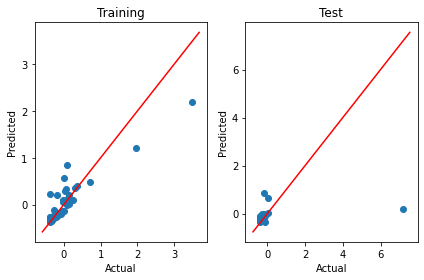

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/2var_pres.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
# our target variable is 'Prestress'
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variable
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)

y = y.reshape(-1)




# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
#min_max_scaler = MinMaxScaler()
#X_train = min_max_scaler.fit_transform(X_train)
#X_test = min_max_scaler.transform(X_test)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) #no of trees were chosen iteratively
# Train the model on training data
rf.fit(X_train, y_train);



# metrics
pred = rf.predict(X_test)
pred

trainpreds = rf.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test


errors = abs(pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 4), '%.')


# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
feature_list = ['Gel(kPa)', 'Area(um2)']
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = rf.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')



# Limit depth of tree to 3 levels
rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


# this makes the individual subplots
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=rf.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=rf.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

Support Vector Regressor

0.27304285616889684
3.350739260350786
Test Accuracy: 103.8602 %.


<function matplotlib.pyplot.show(*args, **kw)>

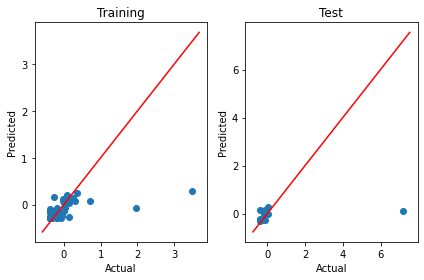

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/2var_pres.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)
y = y.reshape(-1)


# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

from sklearn.svm import SVR
regrassor = SVR(kernel = 'rbf')
regrassor.fit(X_train, y_train)


# metrics
pred = regrassor.predict(X_test)
pred

trainpreds = regrassor.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test



errors = abs(pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 4), '%.')

# this makes the individual subplots
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=regrassor.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=regrassor.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show


KNN

0.2704168842158813
3.12720335262937
Test Accuracy: 59.6281 %.


<function matplotlib.pyplot.show(*args, **kw)>

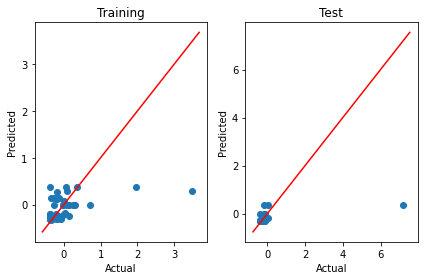

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/2var_pres.csv')
#df.info()

# drop any rows with missing values
df.dropna(axis=0, inplace=True)
#df.info()

# convert categorical variable into dummy variables
#df = pd.get_dummies(df, columns=['ocean_proximity'])
#df.info()

from keras.backend import reshape
y = df['Prestress(Pa)']
X = df.drop('Prestress(Pa)', axis=1)
#print(X.shape, y.shape)


# convert to numpy array
X = np.array(X)
y = np.array(y)

#Standarzing the variables
y = y.reshape(-1,1)

StdS_X = StandardScaler()
StdS_y = StandardScaler()
X = StdS_X.fit_transform(X)
y = StdS_y.fit_transform(y)
y = y.reshape(-1)



# split into X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)



#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=15)
knn_model.fit(X_train, y_train)


# metrics
pred = knn_model.predict(X_test)
pred

trainpreds = knn_model.predict(X_train)

from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_train, trainpreds)) # train
print(mean_squared_error(y_test, pred)) # test


errors = abs(pred - y_test)
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Test Accuracy:', round(accuracy, 4), '%.')


# this makes the individual subplots
# scatterplot of actual vs. pred
# specify the dimensions 
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=knn_model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=knn_model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Test")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show
